In [1]:
import pandas as pd
import numpy as np
from gwpy.table import Table
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
coinc_fix = Table.read('snr_validation/coinc.xml', tablename='coinc_inspiral:table').to_pandas()[['mass', 'mchirp', 'snr']]
# row index is identical to coinc id

sim_fix = Table.read('snr_validation/coinc.xml', tablename='sim_inspiral:table').to_pandas()[['distance', 'mass1', 'mass2', 'source']]
# row index is equal to simulation id

inj_fix = Table.read('snr_validation/inj.xml', tablename='sim_inspiral:table').to_pandas()[['source', 'mass1', 'mass2', 'distance']]
# row index is equal to event id

stats_fix = pd.read_csv('snr_validation/bayestar.tsv', sep='\t').sort_values('simulation_id')[['snr', 'distmean', 'diststd', 'area(50)', 'area(90)']].reset_index(drop=True)

detect_fix = pd.concat([sim_fix[['source', 'mass1', 'mass2', 'distance']], stats_fix[['distmean', 'diststd', 'area(50)', 'area(90)']], coinc_fix['snr']], axis=1).rename(columns={'distance':'dist_true', 'area(50)':'area_50', 'area(90)':'area_90'})

In [3]:
coinc_log = Table.read('log_distr/coinc.xml', tablename='coinc_inspiral:table').to_pandas()[['mass', 'mchirp', 'snr']]
# row index is identical to coinc id

sim_log = Table.read('log_distr/coinc.xml', tablename='sim_inspiral:table').to_pandas()[['distance', 'mass1', 'mass2', 'source']]
# row index is equal to simulation id

inj_log = Table.read('log_distr/inj.xml', tablename='sim_inspiral:table').to_pandas()[['source', 'mass1', 'mass2', 'distance']]
# row index is equal to event id

stats_log = pd.read_csv('log_distr/bayestar.tsv', sep='\t').sort_values('simulation_id')[['snr', 'distmean', 'diststd', 'area(50)', 'area(90)']].reset_index(drop=True)

detect_log = pd.concat([sim_log[['source', 'mass1', 'mass2', 'distance']], stats_log[['distmean', 'diststd', 'area(50)', 'area(90)']], coinc_log['snr']], axis=1).rename(columns={'distance':'dist_true', 'area(50)':'area_50', 'area(90)':'area_90'})

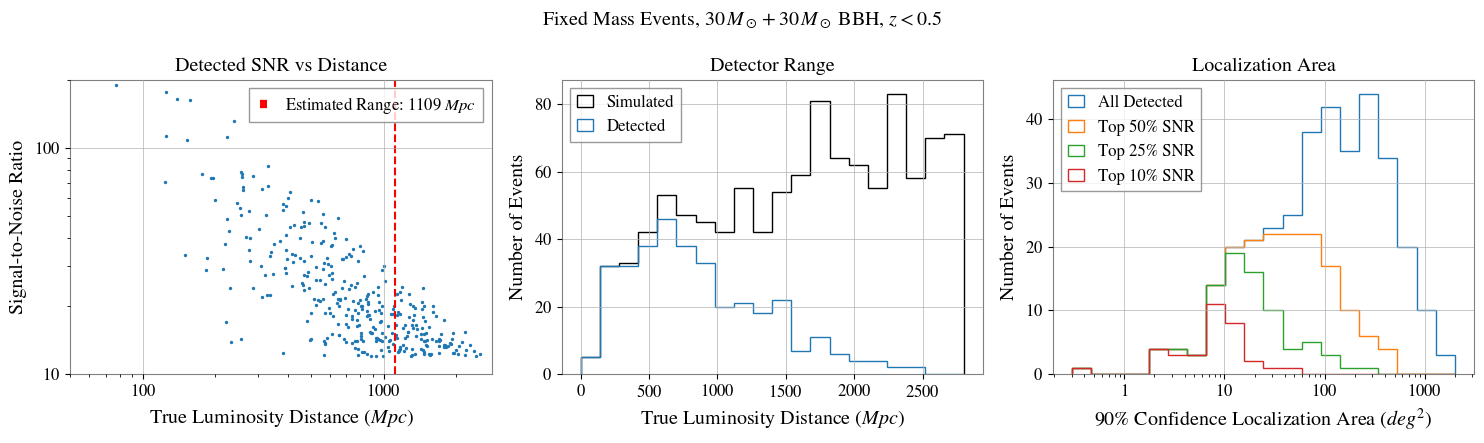

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))
ax[0].scatter(detect_fix['dist_true'], detect_fix['snr'], s=2)
ax[0].axvline(np.max(detect_fix['dist_true'])/2.264, linestyle='--', color='r', label='Estimated Range: {} $Mpc$'.format(int(np.max(detect_fix['dist_true'])/2.264)))
ax[0].set_xlim((5e1, 2.8e3))
ax[0].set_ylim((1e1, 2e2))
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_xlabel('True Luminosity Distance ($Mpc$)')
ax[0].set_ylabel('Signal-to-Noise Ratio')
ax[0].set_title('Detected SNR vs Distance')

ax[1].hist(inj_fix['distance'], bins=20, histtype='step', label='Simulated', range=(0, 2800), color='k')
ax[1].hist(detect_fix['dist_true'], bins=20, histtype='step', label='Detected', range=(0, 2800))
ax[1].legend()
ax[1].set_xlabel('True Luminosity Distance ($Mpc$)')
ax[1].set_ylabel('Number of Events')
ax[1].set_title('Detector Range')

hist, bins = np.histogram(detect_fix['area_90'], bins=20, range=(3e-1, 2e3))
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax[2].hist(detect_fix['area_90'], bins=logbins, histtype='step', label='All Detected')
ax[2].hist(detect_fix['area_90'][detect_fix['snr']>np.percentile(detect_fix['snr'], 50)], bins=logbins, histtype='step', label='Top 50% SNR')
ax[2].hist(detect_fix['area_90'][detect_fix['snr']>np.percentile(detect_fix['snr'], 75)], bins=logbins, histtype='step', label='Top 25% SNR')
ax[2].hist(detect_fix['area_90'][detect_fix['snr']>np.percentile(detect_fix['snr'], 90)], bins=logbins, histtype='step', label='Top 10% SNR')
ax[2].set_xscale('log')
ax[2].legend()
ax[2].set_xlabel('90% Confidence Localization Area ($deg^2$)')
ax[2].set_ylabel('Number of Events')
ax[2].set_title('Localization Area')

fig.suptitle('Fixed Mass Events, $30\,M_\odot + 30\,M_\odot$ BBH, $z<0.5$')
fig.tight_layout()

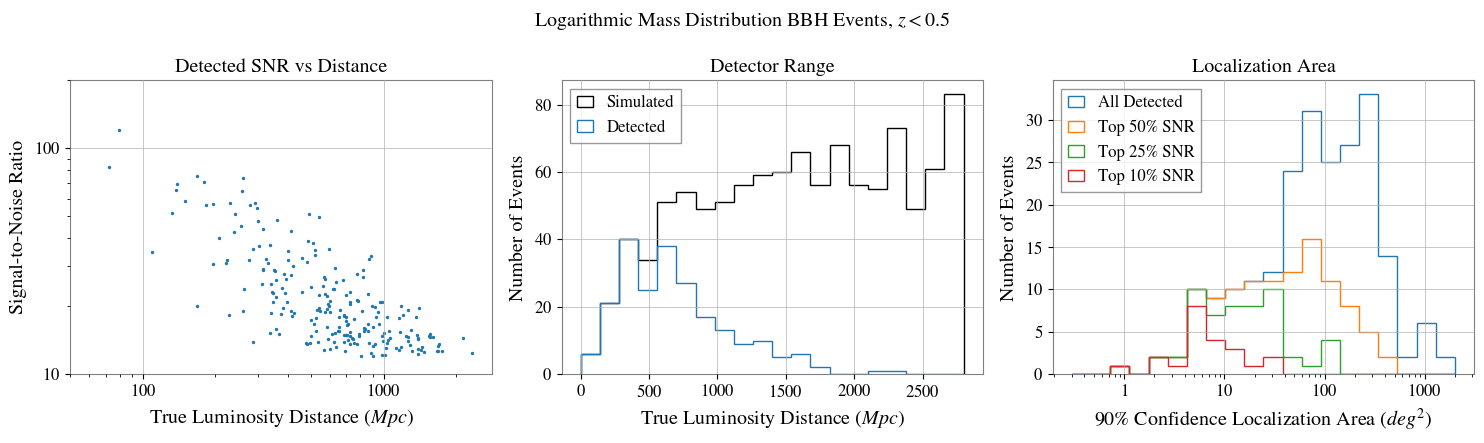

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))
ax[0].scatter(detect_log['dist_true'], detect_log['snr'], s=2)
#ax[0].axvline(np.max(detect_log['dist_true'])/2.264, linestyle='--', color='r', label='Range: {} $Mpc$'.format(int(np.max(detect_log['dist_true'])/2.264)))
ax[0].set_xlim((5e1, 2.8e3))
ax[0].set_ylim((1e1, 2e2))
ax[0].set_xscale('log')
ax[0].set_yscale('log')
#ax[0].legend()
ax[0].set_xlabel('True Luminosity Distance ($Mpc$)')
ax[0].set_ylabel('Signal-to-Noise Ratio')
ax[0].set_title('Detected SNR vs Distance')

ax[1].hist(inj_log['distance'], bins=20, histtype='step', label='Simulated', range=(0, 2800), color='k')
ax[1].hist(detect_log['dist_true'], bins=20, histtype='step', label='Detected', range=(0, 2800))
ax[1].legend()
ax[1].set_xlabel('True Luminosity Distance ($Mpc$)')
ax[1].set_ylabel('Number of Events')
ax[1].set_title('Detector Range')

hist, bins = np.histogram(detect_log['area_90'], bins=20, range=(3e-1, 2e3))
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax[2].hist(detect_log['area_90'], bins=logbins, histtype='step', label='All Detected')
ax[2].hist(detect_log['area_90'][detect_log['snr']>np.percentile(detect_log['snr'], 50)], bins=logbins, histtype='step', label='Top 50% SNR')
ax[2].hist(detect_log['area_90'][detect_log['snr']>np.percentile(detect_log['snr'], 75)], bins=logbins, histtype='step', label='Top 25% SNR')
ax[2].hist(detect_log['area_90'][detect_log['snr']>np.percentile(detect_log['snr'], 90)], bins=logbins, histtype='step', label='Top 10% SNR')
ax[2].set_xscale('log')
ax[2].legend()
ax[2].set_xlabel('90% Confidence Localization Area ($deg^2$)')
ax[2].set_ylabel('Number of Events')
ax[2].set_title('Localization Area')

fig.suptitle('Logarithmic Mass Distribution BBH Events, $z<0.5$')
fig.tight_layout()

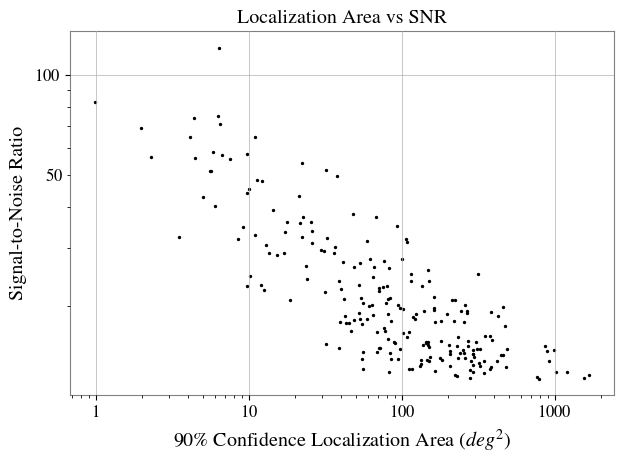

In [6]:
fig, ax = plt.subplots()
ax.scatter(detect_log['area_90'], detect_log['snr'], s=2, color='k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('90% Confidence Localization Area ($deg^2$)')
ax.set_ylabel('Signal-to-Noise Ratio')
ax.set_title('Localization Area vs SNR')
fig.tight_layout()

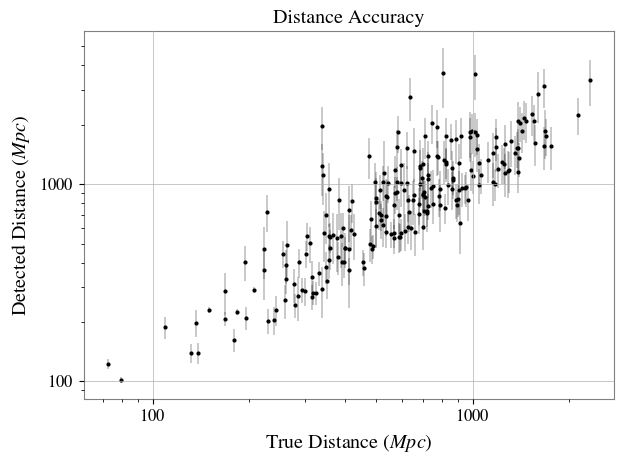

In [7]:
fig, ax = plt.subplots()
ax.errorbar(detect_log['dist_true'], detect_log['distmean'], yerr=detect_log['diststd'], fmt='ok', markersize=2, elinewidth=0.3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('True Distance ($Mpc$)')
ax.set_ylabel('Detected Distance ($Mpc$)')
ax.set_title('Distance Accuracy')
fig.tight_layout()

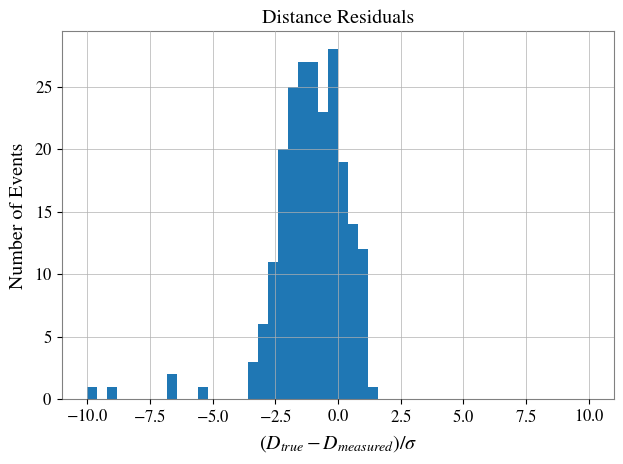

In [8]:
fig, ax = plt.subplots()
ax.hist((detect_log['dist_true']-detect_log['distmean'])/detect_log['diststd'], bins=50, histtype='stepfilled', range=(-10, 10))
ax.set_xlabel('$(D_{true}-D_{measured})/\sigma$')
ax.set_ylabel('Number of Events')
ax.set_title('Distance Residuals')
fig.tight_layout()

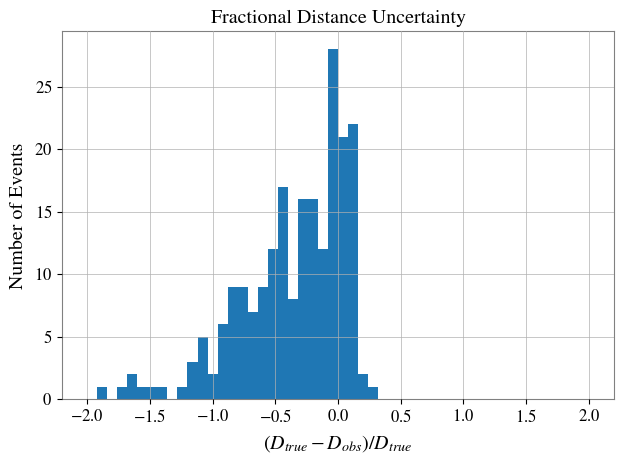

In [9]:
fig, ax = plt.subplots()
ax.hist((detect_log['dist_true']-detect_log['distmean'])/detect_log['dist_true'], bins=50, histtype='stepfilled', range=(-2,2))
ax.set_xlabel('$(D_{true}-D_{obs})/D_{true}$')
ax.set_ylabel('Number of Events')
ax.set_title('Fractional Distance Uncertainty')
fig.tight_layout()